In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import string
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv(r'Downloads\JetNtuple_RunIISummer16_13TeV_MC_csv_100k_2.csv')

In [8]:
dfqg = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()
pd.set_option('display.max_columns', 100)
dfqg.head(25)

index  Unnamed: 0  EventNum        jetPt    jetEta    jetPhi     jetMass  \
0       0           0         0   201.199550 -0.455842 -1.927541   20.587746   
1       3           3         3  1263.015700  0.024581 -1.778938   65.909690   
2      12          12        12    82.229380 -1.320099 -2.670095   15.429768   
3      13          13        13    48.539627  0.049073  0.864631   12.076053   
4      15          15        15   669.235530 -0.439643 -0.393544   97.214250   
5      16          16        16   501.242300  0.601614  2.737236   51.259247   
6      18          18        18   141.455600  1.754201 -0.787613   21.639269   
7      22          22        22  1692.574600  0.382128  0.716857   84.980890   
8      23          23        23  1593.476800  0.564583 -2.422924  114.186516   
9      25          25        25    44.837635 -0.594420 -1.396114    4.827498   
10     27          27        27   449.805570  2.274352  2.046696   37.235184   
11     28          28        28   253.698970 -0.438254 -1.116199   37.099907   
12     30          30        30   347.280300  0.584976 -1.823798   47.088936   
13     31          31        31   224.976610 -0.977891  1.542121   38.461967   
14     35          35        35   499.528720  0.095823 -1.115410   35.146490   
15     36          36        36   326.563600 -0.954428  2.016873   24.970198   
16     38          38        38    44.716625 -0.496503  0.550603    7.034451   
17     41          41        41    30.330975  1.987485  1.174142    5.080752   
18     43          43        43   100.966310 -0.090108 -1.830996   14.063759   
19     48          48        48   189.419420  0.464078  1.267593   17.477140   
20     52          52        52   137.062740 -1.988891 -1.746343   12.081212   
21     55          55        55    68.059814  1.303810  1.284802    9.099072   
22     61          61        61  1671.449700  0.184619  1.717123   72.143180   
23     62          62        62  1593.837300 -0.551056 -1.417921  177.134230   
24     63          63        63   410.412720  0.796808  1.886634   18.499653   

    jetGirth   jetArea     jetRawPt  jetRawMass  jetLooseID  jetTightID  \
0   0.041613  0.488692   191.304140   19.575197           1           1   
1   0.019175  0.498665  1196.449300   62.435963           1           1   
2   0.134551  0.508639    75.368790   14.142426           1           1   
3   0.213575  0.498665    49.997986   12.438873           1           1   
4   0.131847  0.508639   627.197400   91.107720           1           1   
5   0.056477  0.518612   470.542080   48.119705           1           1   
6   0.099817  0.488692   124.051430   18.976854           1           1   
7   0.022170  0.568479  1605.873900   80.627815           1           1   
8   0.043042  0.558505  1511.209100  108.291310           1           1   
9   0.076552  0.498665    42.987183    4.628267           1           1   
10  0.052036  0.498665   422.217220   34.951400           1           1   
11  0.104771  0.488692   240.512650   35.171593           1           1   
12  0.094518  0.508639   330.892820   44.866900           1           1   
13  0.121530  0.498665   210.972800   36.067875           1           1   
14  0.028583  0.498665   472.161770   33.220970           1           1   
15  0.033325  0.468746   302.982500   23.167105           1           1   
16  0.080151  0.568479    43.765610    6.884845           1           1   
17  0.070067  0.518612    26.048883    4.363458           1           1   
18  0.087840  0.498665    99.229515   13.821838           1           1   
19  0.047281  0.478719   181.294660   16.727495           1           1   
20  0.034178  0.528585   118.014595   10.402238           1           1   
21  0.088629  0.398932    63.582990    8.500554           1           1   
22  0.013716  0.518612  1592.359900   68.729500           1           1   
23  0.086199  0.468746  1511.447100  167.977650           1           1   
24  0.011887  0.538559   381.251340   17.185183 

In [7]:
X = dfqg.drop(['isPhysUDS', 'isPhysG', 'EventNum', 'PF_pT', 'PF_dR', 'PF_dTheta', 'PF_dPhi', 'PF_mass', 'jetLooseID',
       'jetTightID', 'jetGenMatch','PF_pT', 'PF_dR', 'PF_dTheta',
       'PF_dPhi','eventJetMult', 'jetPtOrder',
        'event', 'run', 'lumi', 'pthat', 'eventWeight', 
       'partonFlav', 'hadronFlav', 'physFlav', 'isPhysOther',
       'isPartonUDS', 'isPartonG', 'Unnamed: 0', 'isPartonOther', 'rhoCentralNeutral', 'rhoCentralChargedPileUp',
       'PV_npvsGood', 'Pileup_nPU', 'jetRawPt', 'index', 'jetRawMass', 'Pileup_nTrueInt', 'PF_dEta', 'PF_mass', 'PF_id', 'PF_fromPV', 'PF_fromAK4Jet', 'genJetPt', 'genJetEta', 'genJetPhi', 'genJetMass', 'nGenJetPF', 'genJetPF_pT', 'genJetPF_dR', 'genJetPF_dTheta', 'genJetPF_mass', 'genJetPF_id'], axis=1)
X2 = dfqg.drop(['isPhysUDS', 'EventNum', 'PF_pT', 'PF_dR', 'PF_dTheta', 'PF_dPhi', 'PF_mass', 'jetLooseID',
       'jetTightID', 'jetGenMatch','PF_pT', 'PF_dR', 'PF_dTheta',
       'PF_dPhi','eventJetMult', 'jetPtOrder',
        'event', 'run', 'lumi', 'pthat', 'eventWeight', 
       'partonFlav', 'hadronFlav', 'physFlav', 'isPhysOther',
       'isPartonUDS', 'isPartonG', 'Unnamed: 0', 'isPartonOther', 'rhoCentralNeutral', 'rhoCentralChargedPileUp',
       'PV_npvsGood', 'Pileup_nPU', 'jetRawPt', 'index', 'jetRawMass', 'Pileup_nTrueInt', 'PF_dEta', 'PF_mass', 'PF_id', 'PF_fromPV', 'PF_fromAK4Jet', 'genJetPt', 'genJetEta', 'genJetPhi', 'genJetMass', 'nGenJetPF', 'genJetPF_pT', 'genJetPF_dR', 'genJetPF_dTheta', 'genJetPF_mass', 'genJetPF_id'], axis=1)

#large dataset (most amount of high level features) including target (gluon)
XL = dfqg.drop(['isPhysUDS', 'EventNum', 'PF_pT', 'PF_dR', 'PF_dTheta', 'PF_dPhi', 'PF_mass', 'jetLooseID',
       'jetTightID', 'jetGenMatch','PF_pT', 'PF_dR', 'PF_dTheta',
       'PF_dPhi', 'index',
        'event', 'run', 
       'partonFlav', 'hadronFlav', 'physFlav', 'isPhysOther',
       'isPartonUDS', 'isPartonG', 'Unnamed: 0', 'isPartonOther',
         'Pileup_nTrueInt', 'PF_dEta', 'PF_mass', 'PF_id', 'PF_fromPV', 'PF_fromAK4Jet', 'genJetPt', 'genJetEta', 'genJetPhi', 'genJetMass', 'nGenJetPF', 'genJetPF_pT', 'genJetPF_dR', 'genJetPF_dTheta', 'genJetPF_mass', 'genJetPF_id'], axis=1)
#excluding target (gluon)
XLD = dfqg.drop(['isPhysUDS', 'isPhysG', 'EventNum', 'PF_pT', 'PF_dR', 'PF_dTheta', 'PF_dPhi', 'PF_mass', 'jetLooseID',
       'jetTightID', 'jetGenMatch','PF_pT', 'PF_dR', 'PF_dTheta',
       'PF_dPhi', 'index',
        'event', 'run', 'eventWeight',
       'partonFlav', 'hadronFlav', 'physFlav', 'isPhysOther',
       'isPartonUDS', 'isPartonG', 'Unnamed: 0', 'isPartonOther',
         'Pileup_nTrueInt', 'PF_dEta', 'PF_mass', 'PF_id', 'PF_fromPV', 'PF_fromAK4Jet', 'genJetPt', 'genJetEta', 'genJetPhi', 'genJetMass', 'nGenJetPF', 'genJetPF_pT', 'genJetPF_dR', 'genJetPF_dTheta', 'genJetPF_mass', 'genJetPF_id'], axis=1)

pd.set_option('display.max_columns', 100)



y= dfqg['isPhysUDS']
#hh = Xcl.stack().reset_index()
#h1= np.flatten(Xcl)
len(XLD.columns)
#X2.columns
#XLD.head(20)
#X2.head()

31

The dataset has 67 features. Clearly not all of them are useful! Since we are only interested in the flavor of the jet (i.e. "high level") we can safely remove all the generator level and PF level data. Let us plot pairwise the  relationships in the dataset. This is still too many features which leads to overfitting, as we'll see later, most of these features are not useful.

C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


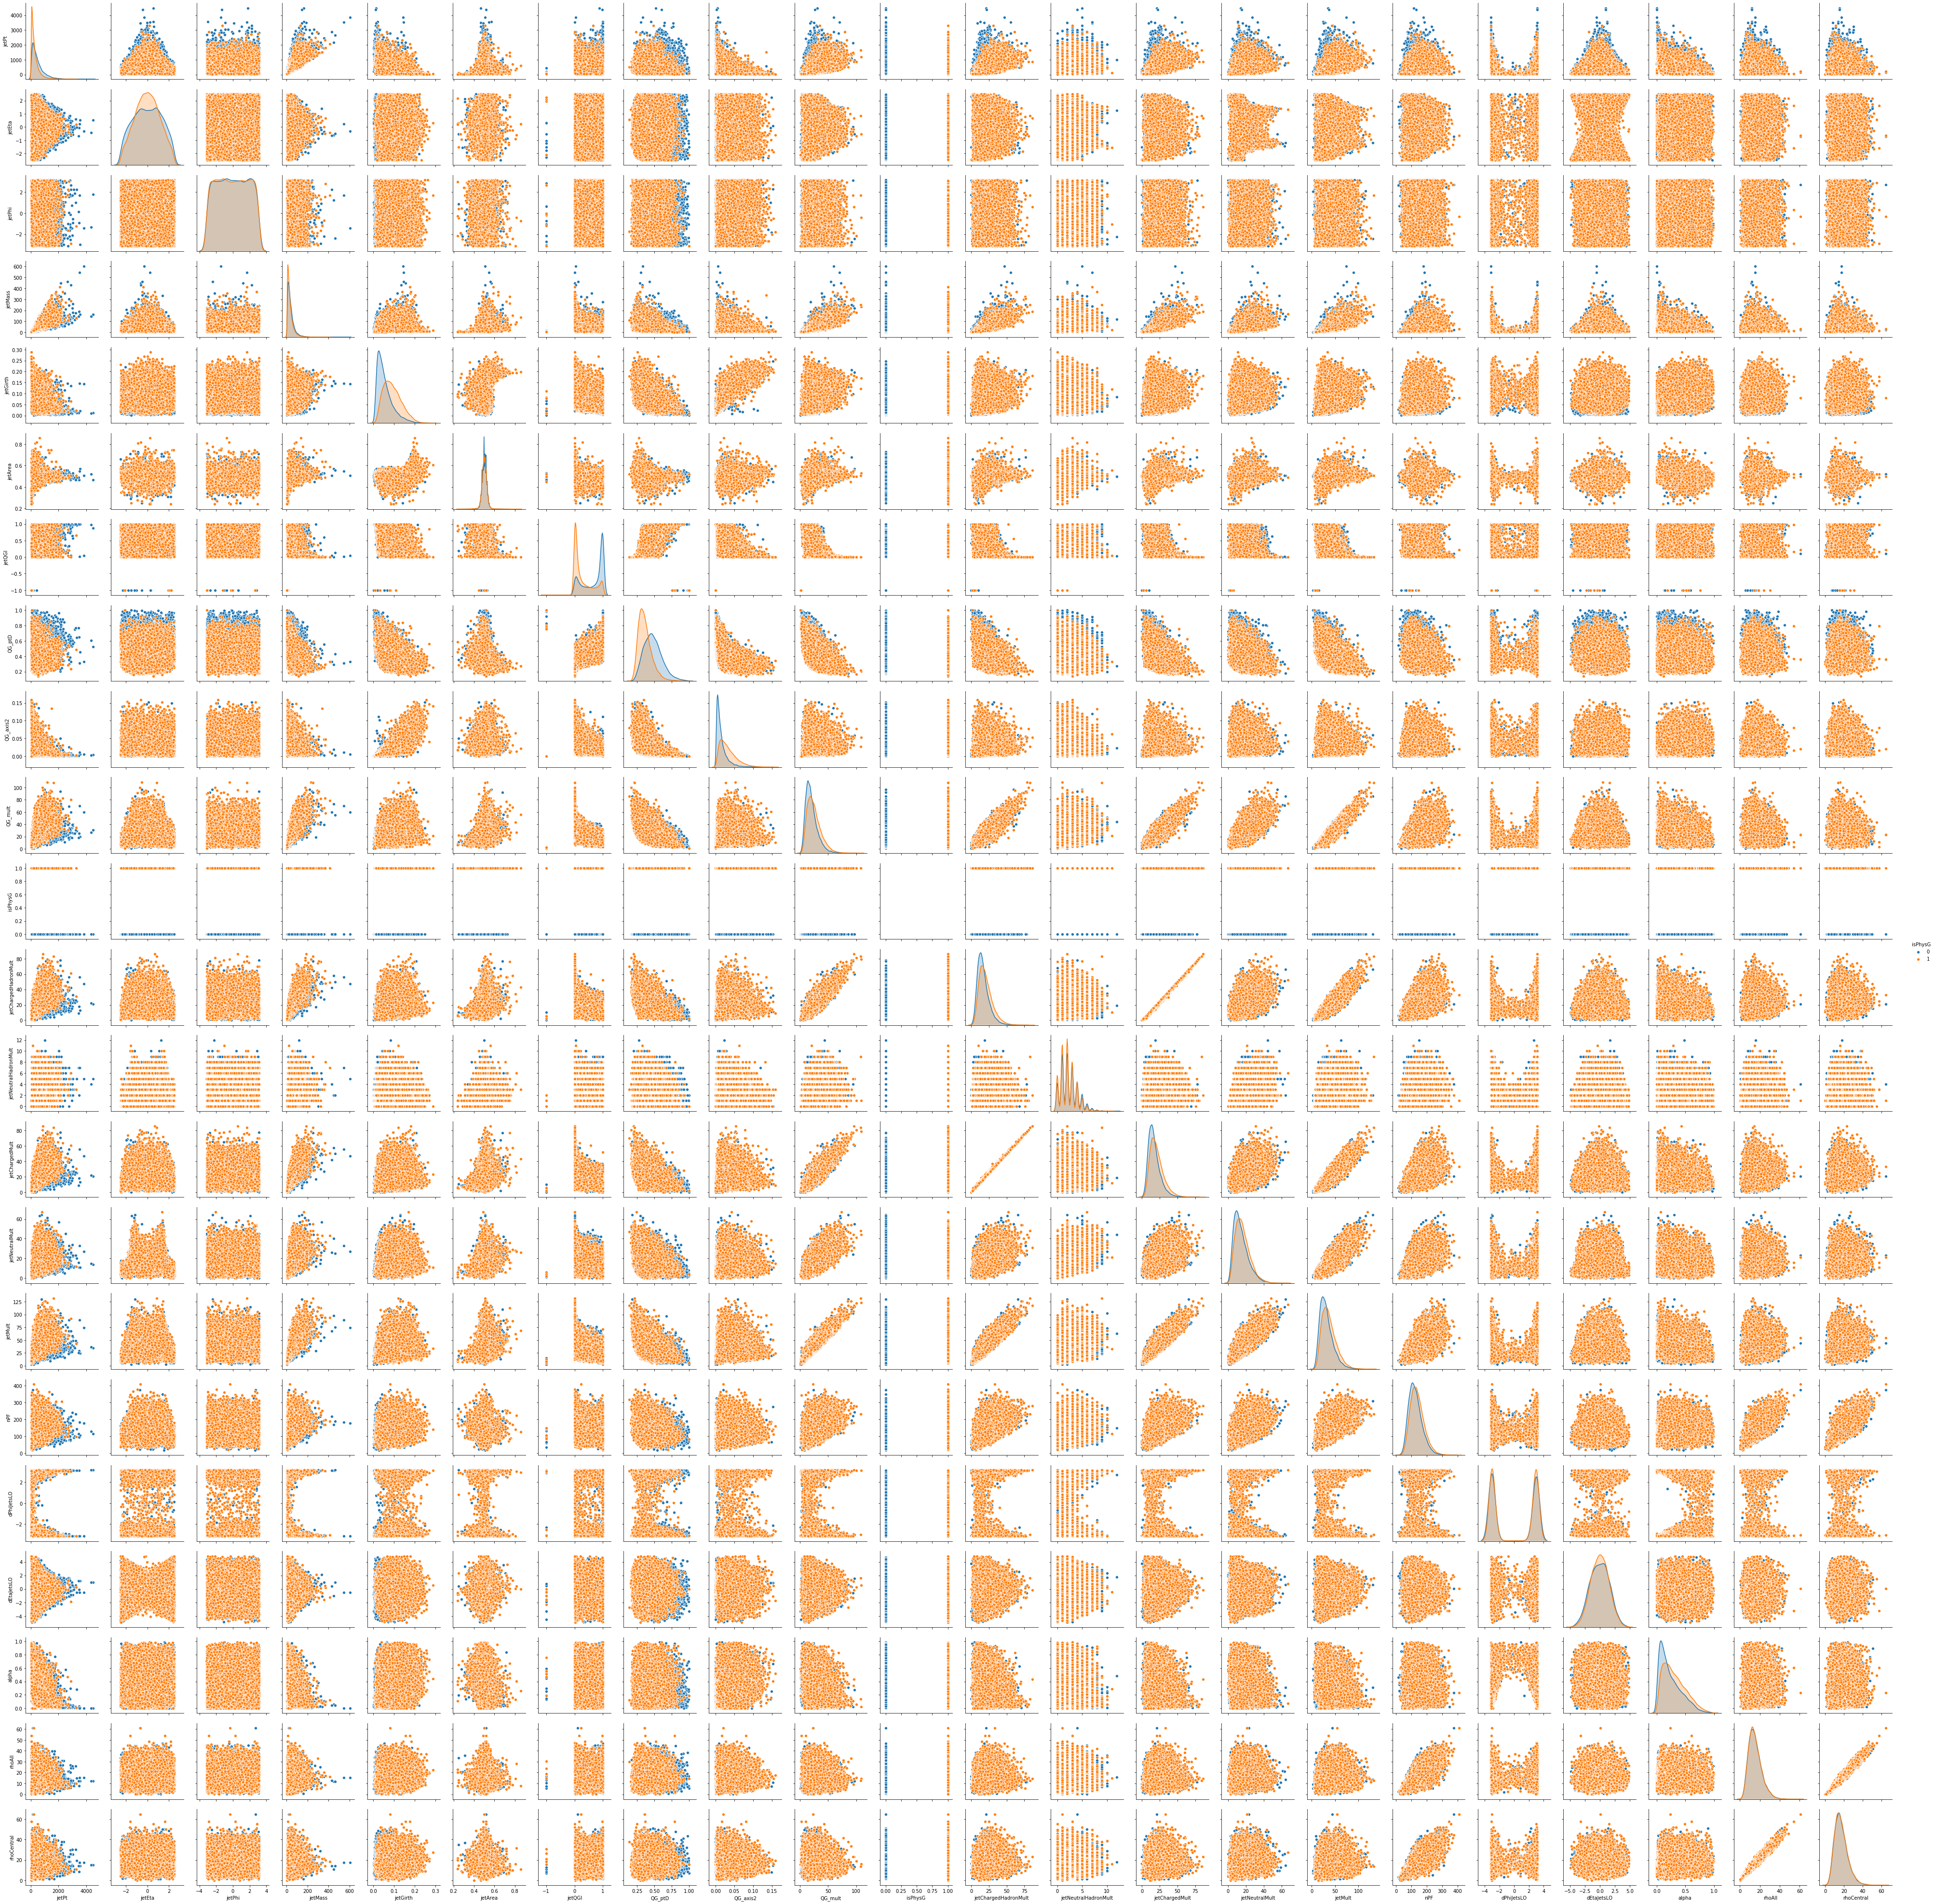

In [6]:
import seaborn as sns #visualizing linear regression model
sns.pairplot(X2, hue= 'isPhysG')

In [9]:
# from keras.models import load_model
# model.save('model_file.h5')
# my_model = load_model('my_model.h5')
# predictions = my_model.predict(data_to_predict_with)
# prob_true = predictions[:,1]
# my_model.summary()


# Save and load the entire model
# torch.save(linear, 'model.pkl')
# model = torch.load('model.pkl')

# # Save and load only the model parameters(recommended)
# torch.save(linear.state_dict(), 'params.pkl')
# linear.load_state_dict(torch.load('params.pkl'))
X.columns

Index(['jetPt', 'jetEta', 'jetPhi', 'jetMass', 'jetGirth', 'jetArea', 'jetQGl',
       'QG_ptD', 'QG_axis2', 'QG_mult', 'jetChargedHadronMult',
       'jetNeutralHadronMult', 'jetChargedMult', 'jetNeutralMult', 'jetMult',
       'nPF', 'dPhiJetsLO', 'dEtaJetsLO', 'alpha', 'rhoAll', 'rhoCentral'],
      dtype='object')

In [10]:
X = dfqg.drop(['isPhysUDS', 'isPhysG', 'EventNum', 'PF_pT', 'PF_dR', 'PF_dTheta', 'PF_dPhi', 'PF_mass', 'jetLooseID',
       'jetTightID', 'jetGenMatch','PF_pT', 'PF_dR', 'PF_dTheta',
       'PF_dPhi','eventJetMult', 'jetPtOrder', 'alpha', 'rhoAll', 'rhoCentral',
        'event', 'run', 'lumi', 'pthat', 'eventWeight', 
       'partonFlav', 'hadronFlav', 'physFlav', 'isPhysOther',
       'isPartonUDS', 'isPartonG', 'Unnamed: 0', 'isPartonOther', 'rhoCentralNeutral', 'rhoCentralChargedPileUp',
       'PV_npvsGood', 'Pileup_nPU', 'jetRawPt', 'index', 'jetRawMass', 'Pileup_nTrueInt', 'PF_dEta', 'PF_mass', 'PF_id', 'PF_fromPV', 'PF_fromAK4Jet', 'genJetPt', 'genJetEta', 'genJetPhi', 'genJetMass', 'nGenJetPF', 'genJetPF_pT', 'genJetPF_dR', 'genJetPF_dTheta', 'genJetPF_mass', 'genJetPF_id'], axis=1)


In [62]:
len(X.columns)

18

In [13]:
#Since these feattures are on very different scales, we have to scale or normalize the features

X_scaled = (X- X.mean())/X.std()
X_scaled

jetPt    jetEta    jetPhi   jetMass  jetGirth   jetArea    jetQGl  \
0     -0.467591 -0.385726 -1.062058 -0.519123 -0.831475 -0.541190  1.415491   
1      2.520676  0.018288 -0.980008  0.940137 -1.335549 -0.165791  1.421489   
2     -0.802408 -1.112528 -1.472052 -0.685198  1.256371  0.209609 -1.100249   
3     -0.897221  0.038885  0.479612 -0.793180  3.031609 -0.165791 -1.033399   
4      0.849602 -0.372104 -0.215077  1.948071  1.195607  0.209609 -0.145961   
...         ...       ...       ...       ...       ...       ...       ...   
48879 -0.249570 -0.892037  1.086848 -0.484324 -0.884082 -0.165791  1.456016   
48880 -0.665690  0.254866  1.223163 -0.682947 -0.312950 -0.916590  1.369457   
48881 -0.665825 -0.434201 -0.534023 -0.550531  0.179670  0.209609 -0.549310   
48882  0.043776  1.164576 -0.730557 -0.139074 -0.959158  0.960409  0.950769   
48883 -0.445681 -0.166493  0.922721 -0.622140 -0.790641  0.585010  0.828979   

         QG_ptD  QG_axis2   QG_mult  jetChargedHadronMult  \
0      0.642457 -0.782208 -0.658349             -0.576529   
1      0.439612 -0.993280 -0.232763             -0.469110   
2     -1.058371  2.084738  0.107706             -0.146852   
3     -0.705101  4.140644 -0.658349             -0.254271   
4     -0.216070 -0.638411  0.533292             -0.146852   
...         ...       ...       ...                   ...   
48879  1.390508 -0.838945 -0.743466             -1.221045   
48880  0.191345 -0.748322 -0.743466             -0.361691   
48881 -0.611224  0.111333 -0.317880              0.390244   
48882 -0.219310 -0.797948  0.107706              0.067986   
48883  0.031545 -0.443486 -0.402997             -0.898787   

       jetNeutralHadronMult  jetChargedMult  jetNeutralMult   jetMult  \
0                 -1.408796       -0.593841       -0.447027 -0.602751   
1                  1.733632       -0.486671       -0.816056 -0.734138   
2                 -0.151824       -0.165161        0.660062  0.251265   
3                 -1.408796       -0.272331       -0.816056 -0.602751   
4                  0.476661       -0.057992       -0.077997 -0.077202   
...                     ...             ...             ...       ...   
48879             -0.151824       -1.236860       -0.201007 -0.865525   
48880             -0.780310       -0.379501       -0.939066 -0.734138   
48881             -0.780310        0.370688       -0.939066 -0.274283   
48882             -0.780310        0.049178        0.168022  0.119878   
48883              0.476661       -0.808180       -0.570036 -0.799831   

            nPF  dPhiJetsLO  dEtaJetsLO  
0     -0.563737    0.882948   -0.302666  
1     -1.734154    1.009532    0.413231  
2      0.269060    0.937771   -0.888706  
3      1.124365    0.937771   -0.888706  
4     -0.766309   -1.044839   -0.674814  
...         ...         ...         ...  
48879 -1.644122   -1.016598   -1.905519  
48880  0.944300   -1.034690    0.538845  
48881  1.191889   -1.034690    0.538845  
48882 -0.203609   -0.998818    1.036808  
48883 -0.293641   -0.998818    1.036808  

[48884 rows x 18 columns]

In [46]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
import tensorflow as tf
#import keras.backend as K
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
features= ['jetPt', 'jetEta', 'jetPhi', 'jetMass', 'jetGirth', 'jetArea', 'jetQGl',
       'QG_ptD', 'QG_axis2', 'QG_mult', 'jetChargedHadronMult',
       'jetNeutralHadronMult', 'jetChargedMult', 'jetNeutralMult', 'jetMult',
       'nPF', 'dPhiJetsLO', 'dEtaJetsLO']
train, test = train_test_split(dfqg, test_size=0.2, random_state=SEED)
train_y = train.isPhysUDS
test_y = test.isPhysUDS

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39107, 18), (9777, 18), (39107,), (9777,))

In [68]:
sum(y_train) #this many quarks in training set 14629
# 24478 gluons

14629

In [70]:
predictors = X_scaled.as_matrix()
#sequetial models require that each layer has weights or connections only to the one layer coming directly after it in the network diagram (simplest)
target = to_categorical(y)
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1])) #Sense layer: all the nodes in the previous layer connect to all the nodes in the next layer
model.add(Dense(100, activation='relu')) #number of nodes and activation function
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #adam is a great optimizer: adjusts learning rate as it does gradient descent
#Categorical cross entropy is the most common/best for classification
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train[:])
model.fit(X_train,
          to_categorical(y_train),
          epochs=20, class_weight=class_weights,
          validation_split=0.2,
          shuffle=True,
          verbose=1)


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 31285 samples, validate on 7822 samples
Epoch 1/20
31232/31285 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.7677

KeyboardInterrupt: 

In [57]:
from keras.models import load_model
model.save('simple_keras_model1.h5')
#my_model = load_model('my_model.h5')
#predictions = my_model.predict(data_to_predict_with)
# prob_true = predictions[:,1]
# my_model.summary()


In [60]:
pred_y_d1 = model.predict(X_test)
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr_d1, tpr_d1, thresholds_d1  = roc_curve(y_test, pred_y_d1)
roc_auc_dnn = auc(fpr_d1, tpr_d1)
plt.clf()
plt.plot(fpr_d1, tpr_d1, label='Simple Keras Neural Network, AUC = %0.2f'% roc_auc_d1)
plt.title("Receiver operating characteristic")
plt.ylabel('Quark jet acceptance rate')
plt.xlabel('Gluon jet acceptance rate')

ValueError: bad input shape (9777, 2)